In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model

2023-03-27 14:24:53.928088: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-27 14:24:53.970798: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 14:24:54.486829: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = load_model('yolov3.h5')

2023-03-27 14:24:55.199165: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-27 14:24:55.228172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-27 14:24:55.228232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-27 14:24:55.230515: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-27 14:24:55.230549: I tensorflow/compile

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input (InputLayer)       [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['image_input[0][0]']            
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   128        ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [4]:
model.compile()

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = np.asarray(Image.open("data/Blore_Clean.jpg"))

/home/allanlago/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (111695860 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [8]:
img.shape

(7877, 14180, 3)

In [18]:
top_left_patch = img[:416, :416]

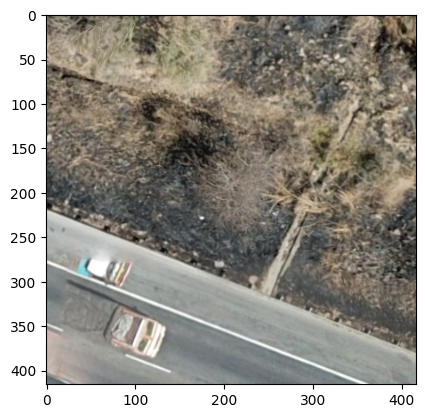

In [19]:
plt.imshow(top_left_patch)

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    image = load_img(filename, target_size=shape)
    # convert to numpy array
    image = img_to_array(image)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    # add a dimension so that we have one sample
    image = np.expand_dims(image, 0)
    return image, width, height

In [21]:
t = model.predict(top_left_patch.reshape(1, *top_left_patch.shape))

1/1 [==============================] - 0s 19ms/step


In [23]:
for a in t:
    print(a.shape)

(1, 13, 13, 75)
(1, 26, 26, 75)
(1, 52, 52, 75)
